# Introduction

### **1. What is Stock Market?**
The stock market is a marketplace where buyers and sellers trade shares of
publicly listed companies. It acts as a platform that connects investors (who want to buy ownership in companies) and companies (that want to raise money).
<br>

### **2. What Moves the Stock Market?**

| Factor              | Impact                                  |
| ------------------- | --------------------------------------- |
| Company performance | Good results = price up; Bad result = price down     |
| Economic indicators | Inflation, interest rates, etc.         |
| Global events       | Wars, pandemics, oil prices             |
| Investor sentiment  | Greed, fear, trends                     |
| News & earnings     | Positive/negative reports impact prices |

#### **3. Objective**
This project aims to predict future stock prices of google based on historical data (2004 - 2025).

#### **4. Description:**
1. Date: The calendar date for the stock data entry.
2. Open: The price at which the stock started trading on that day.
3. High: The highest price the stock reached during the trading day.
4. Low: The lowest price the stock hit during that day.
5. Close: The final price at which the stock traded when the market closed. (Target variable)
6. Volume: The number of shares traded during that day.
<br>

### **5. Example:**
Let’s say you are looking at stock data for Google on May 1, 2025:

| Date       | Open | High | Low | Close | Volume    |
| ---------- | ---- | ---- | --- | ----- | --------- |
| 2025-05-01 | 420  | 430  | 415 | 425   | 2,000,000 |

What this means:
* The stock opened at 420 (USD) in the morning.
* During the day, it went up as high as 430 (USD) and dropped as low as 415 (USD).
* By the market’s closing time, the price was 425 (USD).
* A total of 2 million shares were traded that day.


## Load the Dataset

In [1]:
# Import the neccessary libraries

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM
import math
from sklearn.metrics import mean_squared_error

plt.style.use("seaborn-v0_8-whitegrid")

In [2]:
# Load the dataset
data = pd.read_csv("/content/googl_daily_stockprices.csv")

In [3]:
# Display the basic information about the dataset
data

,date,1. open,2. high,3. low,4. close,5. volume
0,2025-05-28,173.160,175.265,171.9107,172.360,34284926.0
1,2025-05-27,170.160,173.170,170.0000,172.900,37995670.0
2,2025-05-23,169.055,169.960,167.8900,168.470,35211439.0
3,2025-05-22,171.850,176.770,170.7100,170.870,74864418.0
4,2025-05-21,163.690,173.140,163.5600,168.560,73415956.0
...,...,...,...,...,...,...
5222,2004-08-25,104.760,108.000,103.8800,106.000,9188600.0
5223,2004-08-24,111.240,111.600,103.5700,104.870,15247300.0
5224,2004-08-23,110.760,113.480,109.0500,109.400,18256100.0
5225,2004-08-20,101.010,109.080,100.5000,108.310,22834300.0


## Understanding the Variables

In [4]:
#Dataset Rows & Columns count
data.shape

(5227, 6)

In [5]:
# Understand the Dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5227 entries, 0 to 5226
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       5227 non-null   object 
 1   1. open    5227 non-null   float64
 2   2. high    5227 non-null   float64
 3   3. low     5227 non-null   float64
 4   4. close   5227 non-null   float64
 5   5. volume  5227 non-null   float64
dtypes: float64(5), object(1)
memory usage: 245.1+ KB


In [6]:
# Understand the Dataset
data.describe()

,1. open,2. high,3. low,4. close,5. volume
count,5227.000000,5227.000000,5227.000000,5227.000000,5.227000e+03
mean,764.703352,772.330542,756.689687,764.645466,9.735276e+06
std,612.976706,619.095583,606.442500,612.900958,1.205150e+07
min,85.400000,86.520000,83.340000,83.430000,4.656380e+05
25%,399.990000,405.000000,393.620000,398.950000,1.813494e+06
50%,585.930000,589.300000,579.180000,584.180000,4.565200e+06
75%,999.910000,1008.085000,992.075000,1002.570000,1.310330e+07
max,3025.000000,3030.931500,2977.980000,2996.770000,1.277476e+08


## Dataset Cleaning/Wrangling/preprocessing

### Changing the Data type

In [7]:
# Converting the 'date' column into datetime format
data['date']=pd.to_datetime(data['date'])

### Renaming the columns

In [8]:
data.columns

Index(['date', '1. open', '2. high', '3. low', '4. close', '5. volume'], dtype='object')

In [9]:
# renaming the columns
data = data.rename(columns={'1. open':"open",
                            '2. high':"high",
                            '3. low':"low",
                            '4. close':"close",
                            '5. volume':"volume"})

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5227 entries, 0 to 5226
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    5227 non-null   datetime64[ns]
 1   open    5227 non-null   float64       
 2   high    5227 non-null   float64       
 3   low     5227 non-null   float64       
 4   close   5227 non-null   float64       
 5   volume  5227 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 245.1 KB


In [11]:
print(data[data['close'] == 0])

Empty DataFrame
Columns: [date, open, high, low, close, volume]
Index: []


### Checking for null values

In [12]:
data.duplicated().sum()

np.int64(0)

In [13]:
# Check for missing values
mv = data.isnull().sum()
print('Missing values in each column:')
print(mv)

Missing values in each column:
date      0
open      0
high      0
low       0
close     0
volume    0
dtype: int64


The dataset is clean. <br>
The column names were renamed properly for performing EDA and training the model.

## Explorartory Data Analysis

In [ ]:
# data.reset_index(level=0, inplace=True) ---> will be needed later on

In [15]:
data.set_index('date', inplace=True)

In [16]:
#A detailed candlestick chart created with Plotly, providing a comprehensive view of open, high, low, and close prices.
import plotly.graph_objects as go
symbol = 'GOOGL'
#data.set_index('date', inplace=True)
# Candlestick chart
candlestick = go.Figure(data=[go.Candlestick(x=data.index,
                                              open=data['open'],
                                              high=data['high'],
                                              low=data['low'],
                                              close=data['close'])])

candlestick.update_layout(title=f'{symbol} Candlestick Chart',
                          xaxis_title='Date',
                          yaxis_title='Stock Price (USD)',
                          xaxis_rangeslider_visible=False)

candlestick.show()

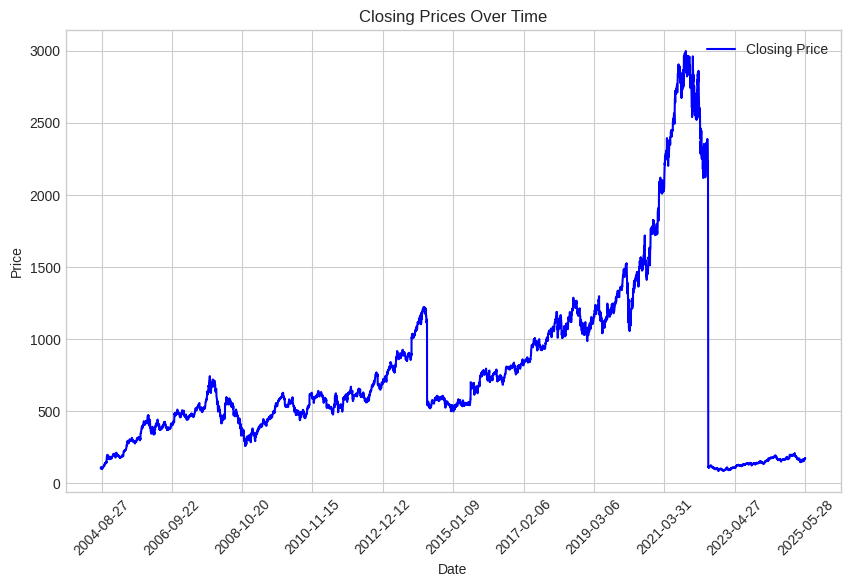

In [17]:
#Line Plot of Closing Prices
plt.figure(figsize=(10, 6))
plt.plot(data['close'], label='Closing Price', color='blue')
plt.title('Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.xticks(rotation=45)
plt.xticks(data.index[::len(data)//10])  # Adjust the step size based on your data size
plt.show()

Observation:
The stock saw significant downward trend from 2022 till 2025

**Price Volatility**
* This is how much the stock price goes up and down in a short time.
* If prices are jumping or falling fast = high volatility.
* If prices are stable and slow-moving = low volatility.

Example:

| Day | Closing Price | Change |
| --- | ------------- | ------ |
| Mon | ₹100          | -      |
| Tue | ₹110          | +10%   |
| Wed | ₹95           | -13.6% |
| Thu | ₹105          | +10.5% |


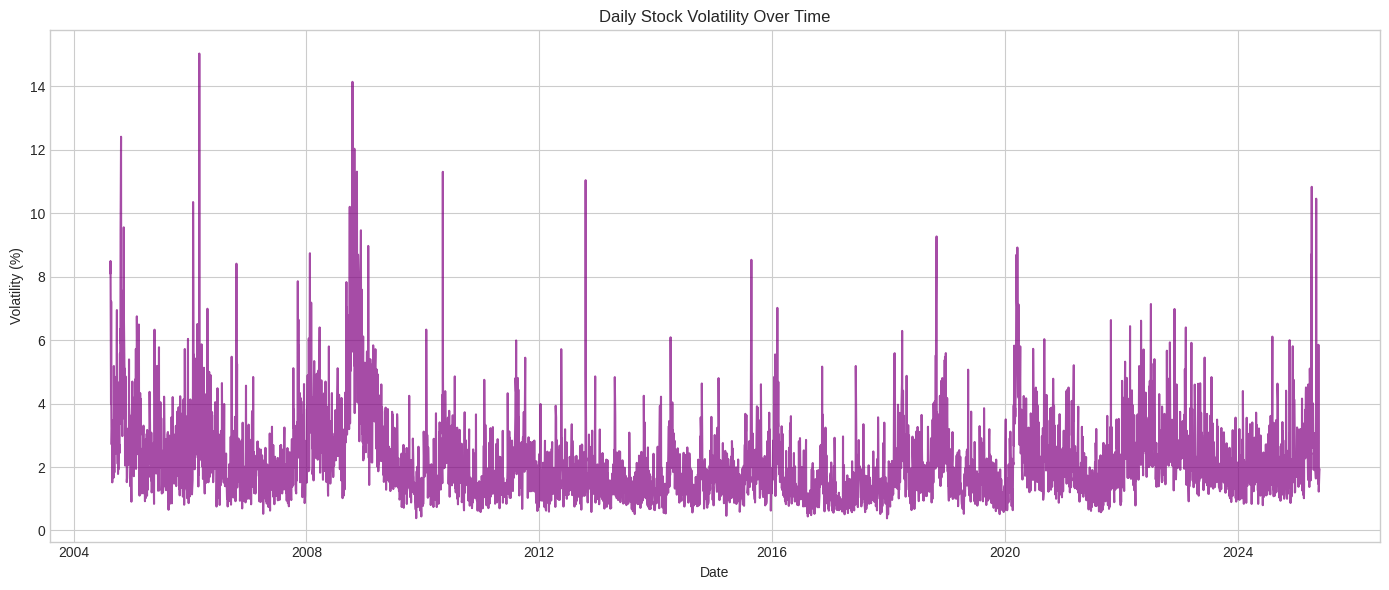

In [18]:
# Calculate daily volatility in percentage
data['volatility'] = ((data['high'] - data['low']) / data['open']) * 100

plt.figure(figsize=(14, 6))
plt.plot(data['volatility'], color='purple', alpha=0.7)
plt.title('Daily Stock Volatility Over Time')
plt.xlabel('Date')
plt.ylabel('Volatility (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

**Observations:** Volatility tends to increase during major financial or global events (like 2008 and 2020). Most of the time, especially between crises, the stock remains relatively stable.

In [19]:
# 'close' is the closing price
data['price_change'] = data['close'].pct_change() * 100  # percent change from previous day

# Correlation between volume of the stocks and the percentage change from previous day (volatility)
correlation = data['volume'].corr(data['price_change'])
print(f"Correlation between volume and price volatility change: {correlation:.2f}")

Correlation between volume and price volatility change: -0.01


**Obseravtions:**
A correlation of -0.01 is very close to 0.

This implies almost no linear relationship between trading volume and price volatility change.

In simpler terms: **When the volume of trades increases or decreases, it doesn't reliably cause the price to go up or down.**

In [ ]:
# data['month'] = data['date'].dt.month

In [20]:
data.reset_index(level=0, inplace=True)
data['daily_return'] = data['close'].pct_change() * 100  # Daily return in %
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month_name()

# 1. Overall Return
overall_return = ((data['close'].iloc[-1] - data['close'].iloc[0]) / data['close'].iloc[0]) * 100
print(f"Overall return: {overall_return:.2f}% from {data['date'].iloc[0].date()} to {data['date'].iloc[-1].date()}")

Overall return: -41.79% from 2025-05-28 to 2004-08-19


In [21]:
# 2. Max and Min Closing Prices
max_close = data['close'].max()
min_close = data['close'].min()
max_date = data[data['close'] == max_close]['date'].iloc[0]
min_date = data[data['close'] == min_close]['date'].iloc[0]
print(f"Max closing price: ₹{max_close:.2f} on {max_date.date()}")
print(f"Min closing price: ₹{min_close:.2f} on {min_date.date()}")

Max closing price: ₹2996.77 on 2021-11-18
Min closing price: ₹83.43 on 2022-11-03


In [22]:
# 3. Average Daily Volatility
daily_volatility = data['daily_return'].std()
print(f"Average daily volatility: {daily_volatility:.2f}%")

Average daily volatility: 27.08%


In [23]:
# 4. Volume Peak
max_volume = data['volume'].max()
max_vol_date = data[data['volume'] == max_volume]['date'].iloc[0]
print(f" Highest trading volume: {max_volume:.0f} on {max_vol_date.date()}")

 Highest trading volume: 127747554 on 2025-05-07


In [24]:
# 5. Monthly Performance
monthly_avg = data.groupby('month')['close'].mean().sort_values(ascending=False)
print("\nMonthly average closing prices:")
print(monthly_avg)


Monthly average closing prices:
month
June         805.298163
February     788.200230
March        783.707196
January      782.480288
July         780.366304
December     780.259252
November     767.529004
April        761.944422
May          759.073863
October      732.777001
August       724.189458
September    715.261719
Name: close, dtype: float64


**Trading Volume**
* This is the number of shares that were bought/sold in a day.
* High volume = lots of people trading.
* Low volume = fewer people trading.



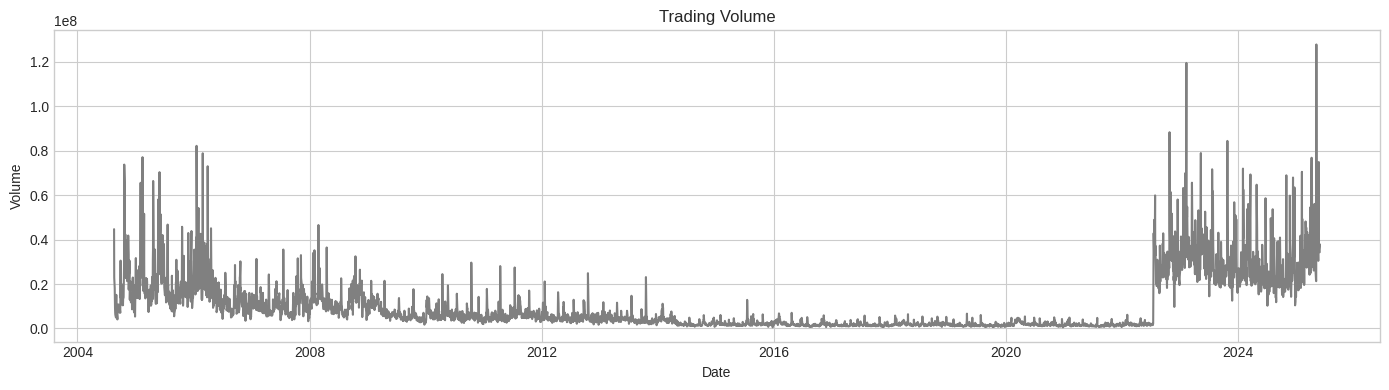

In [25]:
# Volume plot
plt.figure(figsize=(14,4))
plt.plot(data['date'], data['volume'], color='gray')
plt.title('Trading Volume')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True)
plt.tight_layout()
plt.show()

**Observation:**
There is a significant high volume of trading from 2023 to 2025.

In [26]:
data

,date,open,high,low,close,volume,volatility,price_change,daily_return,year,month
0,2025-05-28,173.160,175.265,171.9107,172.360,34284926.0,1.937110,NaN,NaN,2025,May
1,2025-05-27,170.160,173.170,170.0000,172.900,37995670.0,1.862953,0.313298,0.313298,2025,May
2,2025-05-23,169.055,169.960,167.8900,168.470,35211439.0,1.224454,-2.562175,-2.562175,2025,May
3,2025-05-22,171.850,176.770,170.7100,170.870,74864418.0,3.526331,1.424586,1.424586,2025,May
4,2025-05-21,163.690,173.140,163.5600,168.560,73415956.0,5.852526,-1.351905,-1.351905,2025,May
...,...,...,...,...,...,...,...,...,...,...,...
5222,2004-08-25,104.760,108.000,103.8800,106.000,9188600.0,3.932799,-1.769994,-1.769994,2004,August
5223,2004-08-24,111.240,111.600,103.5700,104.870,15247300.0,7.218626,-1.066038,-1.066038,2004,August
5224,2004-08-23,110.760,113.480,109.0500,109.400,18256100.0,3.999639,4.319634,4.319634,2004,August
5225,2004-08-20,101.010,109.080,100.5000,108.310,22834300.0,8.494208,-0.996344,-0.996344,2004,August


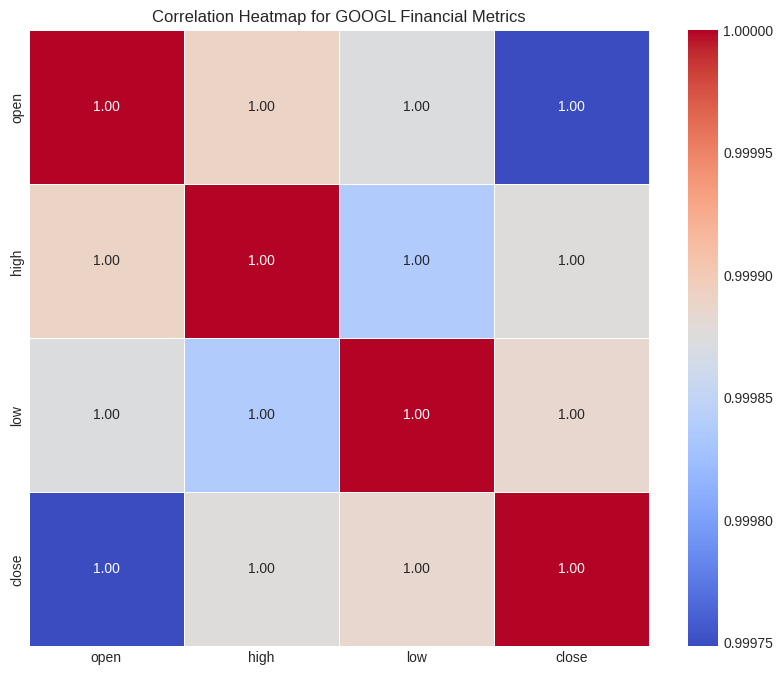

In [27]:
# Correlation Heatmap
correlation_matrix = data[['open', 'high', 'low', 'close']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title(f'Correlation Heatmap for {symbol} Financial Metrics')
plt.show()

In [28]:
data

,date,open,high,low,close,volume,volatility,price_change,daily_return,year,month
0,2025-05-28,173.160,175.265,171.9107,172.360,34284926.0,1.937110,NaN,NaN,2025,May
1,2025-05-27,170.160,173.170,170.0000,172.900,37995670.0,1.862953,0.313298,0.313298,2025,May
2,2025-05-23,169.055,169.960,167.8900,168.470,35211439.0,1.224454,-2.562175,-2.562175,2025,May
3,2025-05-22,171.850,176.770,170.7100,170.870,74864418.0,3.526331,1.424586,1.424586,2025,May
4,2025-05-21,163.690,173.140,163.5600,168.560,73415956.0,5.852526,-1.351905,-1.351905,2025,May
...,...,...,...,...,...,...,...,...,...,...,...
5222,2004-08-25,104.760,108.000,103.8800,106.000,9188600.0,3.932799,-1.769994,-1.769994,2004,August
5223,2004-08-24,111.240,111.600,103.5700,104.870,15247300.0,7.218626,-1.066038,-1.066038,2004,August
5224,2004-08-23,110.760,113.480,109.0500,109.400,18256100.0,3.999639,4.319634,4.319634,2004,August
5225,2004-08-20,101.010,109.080,100.5000,108.310,22834300.0,8.494208,-0.996344,-0.996344,2004,August


## Model Training

In [14]:
x = data.drop('close', axis=1)
y = data['close']

In [15]:
# Taking only the 'close' column into considerations
y

,close
0,172.360
1,172.900
2,168.470
3,170.870
4,168.560
...,...
5222,106.000
5223,104.870
5224,109.400
5225,108.310


### 1. Normalize the Data
It is important to first scale the 'close' column to the range 0 to 1.<br>  Since LSTMs perform better with normalized inputs.

In [16]:
# Normalize the Data

scaler = MinMaxScaler(feature_range = (0,1))
y_scaled = scaler.fit_transform(np.array(y).reshape(-1,1))

In [17]:
y_scaled.shape

(5227, 1)

### 2. Create Sequences (Windows of Data)
Convert time series into sequences (e.g., 60 time steps to predict the next 1).

**Why: LSTM takes sequences as input, not individual points**.<br>
In case of time series data; the data should be divided on basis of date. <br>
The next value is always dependent on the previous value. <br>
For Example: 190,200,210,220,180.... <br>
200 will be dependent on 190. <br>
210 will be dependent on 200. <br>

In [18]:
# Creating Sequences
import numpy

def create_dataset(dataset, time_step = 1):
	X, Y = [], []
	for i in range(len(dataset) - time_step - 1):
		a = dataset[i:(i+time_step), 0]
		X.append(a)
		Y.append(dataset[i + time_step, 0])
	return numpy.array(X), numpy.array(Y)

### 3. Train-Test Split
Split the data chronologically — NOT randomly.

Why: Time series data is temporal. Random shuffling breaks the sequence order and causes data leakage.<br>

I am using 65% of the data for training.
The rest (35%) of the data will be used for testing the model’s performance on unseen data. <br>


In [19]:
# Train - Test Split
train_size = int(len(y) * 0.65)
test_size = len(y) - train_size

train_data, test_data = y_scaled[0:train_size,:],y_scaled[train_size:len(y),:1]

In [20]:
train_data.shape, test_data.shape

((3397, 1), (1830, 1))

### 4. Reshape for LSTM Input

Reshape Y to [samples, time_steps, features]

Why: LSTM expects 3D input.

In [21]:
# Reshaping for LSTM Input
time_step = 100

X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [22]:
# LSTM expects 3D input: [samples, time steps, features]

X_train = X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

### 5. Build the LSTM Model

In [23]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(Dropout(0.2))
model.add(LSTM(50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(1))

In [24]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# model = Sequential()
# model.add(LSTM(64,return_sequences = True, input_shape = (100,1)))
# model.add(Dropout(0.5))
# model.add(LSTM(64))
# model.add(Dense(32))
# model.add(Dropout(0.5))
# model.add(Dense(1))
# model.summary()

In [ ]:
# model = Sequential()
# model.add(LSTM(units=64,return_sequences=True,input_shape=(100,1)))
# model.add(Dropout(0.5))
# model.add(LSTM(units=64))
# model.add(Dropout(0.5))
# model.add(Dense(32))
# model.add(Dropout(0.5))
# model.add(Dense(1))

In [25]:
model.compile(loss = 'mean_squared_error',
              optimizer = 'adam')

### 6. Train the Model

In [26]:
# Model training
model.fit(X_train,y_train,
          validation_data = (X_test,y_test),
          epochs = 50,
          batch_size = 64,
          verbose = 1)

Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 16s 198ms/step - loss: 0.0233 - val_loss: 2.9446e-04
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 19s 166ms/step - loss: 0.0035 - val_loss: 2.3050e-04
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 188ms/step - loss: 0.0035 - val_loss: 1.6627e-04
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 188ms/step - loss: 0.0024 - val_loss: 7.5094e-05
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 9s 176ms/step - loss: 0.0023 - val_loss: 8.4455e-05
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 9s 170ms/step - loss: 0.0028 - val_loss: 6.8538e-05
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 12s 214ms/step - loss: 0.0030 - val_loss: 1.7360e-04
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 19s 189ms/step - loss: 0.0023 - val_loss: 7.1580e-05
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 9s 179ms/step - loss: 0.0027 - val_loss: 6.8756e-05
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 194ms/step - loss: 0.0020 - val_loss: 3.0916e-04
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 191ms/step - loss: 0.0032 - val_loss: 5.8732e-05


### 7. Make Predictions

In [64]:
# Make Predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

103/103 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step


### 8. Inverse Transform the Predictions

In [65]:
print("y_train shape:", y_train.shape)
print("train_predictions shape:", train_predictions.shape)

y_train shape: (3296,)
train_predictions shape: (3296, 1)


In [66]:
# Inverse Transform the Predictions
train_predict_transformed = scaler.inverse_transform(train_predictions)
test_predict_transformed = scaler.inverse_transform(test_predictions)

### 9. Evaluate the Model

In [67]:
# Evaluate the Model - RMSE
# Train Data
print(f"RMSE for Training dataset is {math.sqrt(mean_squared_error(y_train,train_predict_transformed))}")

# Test Data
print(f"RMSE for Testing dataset is {math.sqrt(mean_squared_error(y_test,test_predict_transformed))}")

RMSE for Training dataset is 1198.4740891863796
RMSE for Testing dataset is 460.65531326492294


**Observations:**
1. Lower Testing RMSE than Training RMSE:
  * This is not common, but it can happen due to:
      * Dropout or regularization during training.
      * The test set being “easier” or having less volatility.

Usually, if the model is generalizing well, training RMSE < testing RMSE. <br>
In this case, this may mean the model was overfitting on complex patterns in training data.

2. Validation Loss Curve:
* The validation loss is consistently very low and stable toward the end.
Example: val_loss: 1.12e-05, which is excellent.
* Indicates the model learned well without diverging or overfitting badly.


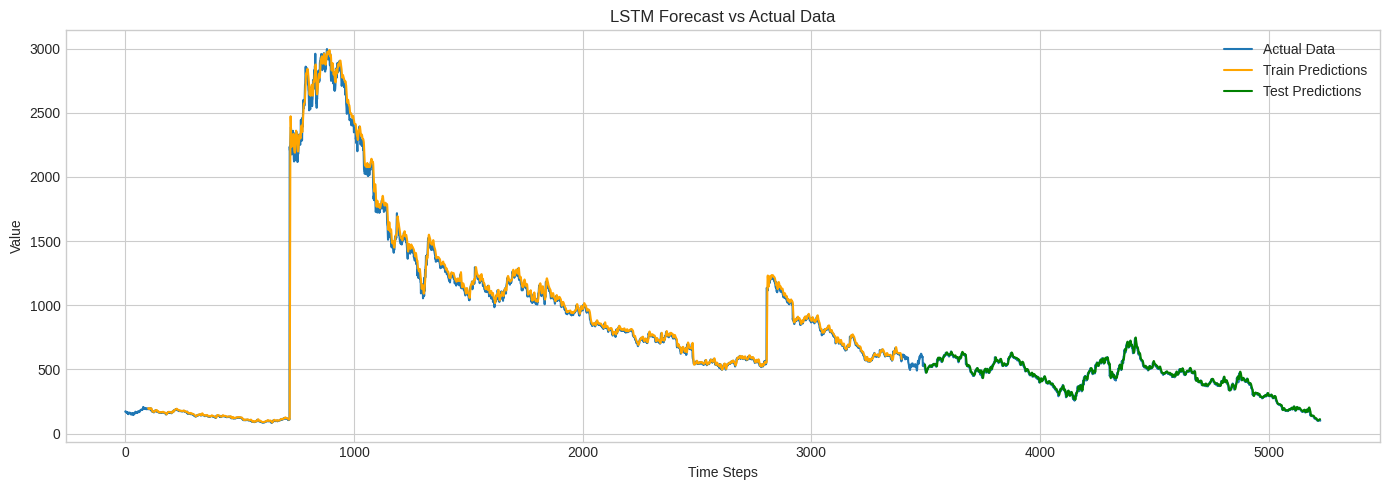

In [70]:
# Parameters
lb = 100

# Create placeholder arrays
trainPredictPlot = np.empty_like(y_scaled)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[lb:len(train_predict_transformed) + lb, :] = train_predict_transformed

testPredictPlot = np.empty_like(y_scaled)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict_transformed) + (lb * 2) + 1:len(y_scaled) - 1, :] = test_predict_transformed

# Plotting
plt.figure(figsize=(14, 5))
plt.plot(scaler.inverse_transform(y_scaled), label='Actual Data')
plt.plot(trainPredictPlot, label='Train Predictions', color='orange')
plt.plot(testPredictPlot, label='Test Predictions', color='green')
plt.title('LSTM Forecast vs Actual Data')
plt.xlabel('Time Steps')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Overall model’s test performance is solid even after multiple runtimes and trial and error method.

The prediction curves align well, and validation loss is very low.

## Predict the Next Day's Stock Price

In [71]:
x_input = test_data[-time_step:]  # last 60 values used for prediction
x_input = x_input.reshape(1, -1)   # reshape to 1 row

In [72]:
# Reshape to (1 sample, time_step, 1 feature)
x_input = x_input.reshape((1, time_step, 1))

In [73]:
next_day_pred = model.predict(x_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


In [74]:
# Assuming 'scaler' is your original MinMaxScaler
next_day_pred_price = scaler.inverse_transform(next_day_pred)
print("Predicted Next Day Price:", next_day_pred_price[0][0])

Predicted Next Day Price: 110.46439


In [75]:
# Last 100 values used for input:
last_input_scaled = x_input.reshape(-1, 1)

# Inverse transform it to actual prices:
last_input_actual = scaler.inverse_transform(last_input_scaled)

# Print last few actual prices:
print(last_input_actual[-5:])  # Show last 5 days


[[106.   ]
 [104.87 ]
 [109.4  ]
 [108.31 ]
 [100.335]]


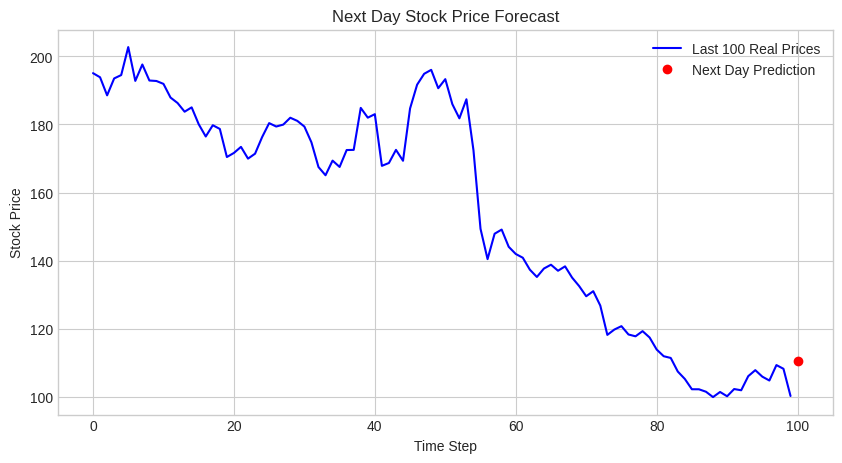

In [63]:
# Plot last 100 real values and next predicted value
last_days = scaler.inverse_transform(x_input.reshape(-1, 1))

plt.figure(figsize=(10, 5))
plt.plot(np.arange(100), last_days, label='Last 100 Real Prices', color='blue')
plt.plot(100, next_day_pred_price, 'ro', label='Next Day Prediction')
plt.title("Next Day Stock Price Forecast")
plt.xlabel("Time Step")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

The model predicts the next day price based on the last 100 days. The predicted value (110.46) is in line with the recent trend (last price = 100.34), indicating that the model generalizes well.

**Conclusion**
* The LSTM model is able to capture stock price patterns and gives sensible predictions. The model may not be perfect it is overfiiting but still manages to generalize providing a decent prediction. Preety much a solid model.
* The RMSE values indicate good performance with no extreme case of overfitting.
* The model's forecast in predicting the nexts day prices is realistic when compared to recent price movements.